In [1]:
from ParaTune.light.GaussianPulse import GaussianPulse
from ParaTune.light.Beam import Beam
from ParaTune.media.SPDCCrystal import SPDCCrystal
from ParaTune.interactions.InteractionSPDC import InteractionSPDC
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, hbar, epsilon_0

# 1D Simulation

In [102]:
# general crystal parameters
crystal_spdc_normal = SPDCCrystal(
    configuration='ppln', # Periodically poled lithium niobate
    medium='KTP', # Medium
    number_grid_points_z=10000, # Number of grid points in z direction
    wavelength_central=775e-9, # Central wavelength in meters
    pump='x', # Polarization of the pump wave
    signal='y', # Polarization of the signal wave
    idler='y', # Polarization of the idler wave
    length=2e-4,
    ) # Length of the crystal in meters

parameters_spdc_normal = np.array(crystal_spdc_normal.poling_function(np.array(crystal_spdc_normal.domain_values)), dtype=np.float32)[:len(crystal_spdc_normal.z_grid)]

bandwidth = 5e-9
wavelength_span = 15*bandwidth
number_of_grid_points = (int)(wavelength_span / (2*crystal_spdc_normal.discretization_step_z))
print(f'Number of grid points: {number_of_grid_points}')
print(f'Wavelength span: {wavelength_span}')
# Gaussian pulse
gaussian = GaussianPulse(
    wavelength_central=775e-9,  # Central wavelength in meters
    wavelength_bandwidth=50e-9,  # Bandwidth in meters
    mean_power=300e-3,  # Mean power in Watts
    repetition_rate=61e6,  # Repetition rate in Hz
    number_of_grid_points=450, # Number of grid points
    wavelength_span=450e-9,  # Wavelength span in meters
    refractive_index_function=crystal_spdc_normal.n_p # Refractive index function
)

simulation_spdc1D = InteractionSPDC(
    gaussian.wavelength_central, 
    (gaussian.frequency_grid[-1]-gaussian.frequency_grid[0])*2*np.pi, 
    crystal_spdc_normal.length,
    gaussian.number_of_grid_points, 
    crystal_spdc_normal.number_grid_points_z, 
    crystal_spdc_normal.n_p, 
    crystal_spdc_normal.n_s,
    crystal_spdc_normal.n_i,
    crystal_spdc_normal.k_p, 
    crystal_spdc_normal.k_s,
    crystal_spdc_normal.k_i, 
    crystal_spdc_normal.wavevector_mismatch,
    crystal_spdc_normal.deff, 
    crystal_spdc_normal.domain_bounds, 
    gaussian.frequency_bandwidth,
    dimensions=1)

domain_width/2 = 6.584287699068232e-06 
dictretization step along z = 2e-08
Number of grid points: 1
Wavelength span: 7.5e-08


In [103]:
Ap, As_out, Ai_out, As_vac, Ai_vac, Ep, Es, Ei, As_evolution_z, Ai_evolution_z = simulation_spdc1D.run(gaussian.frequency_amplitude, parameters_spdc_normal)

Propagation steps: 100%|██████████| 10000/10000 [00:09<00:00, 1080.05it/s]


/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.

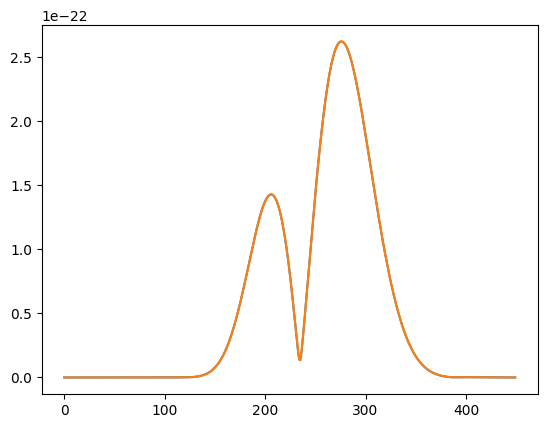

In [104]:
plt.plot(np.abs(As_out))
#plt.plot(np.unwrap(np.angle(As_out), axis=0))
plt.plot(np.abs(Ai_out))


In [27]:
print(crystal_spdc_normal.domain_width)
print((simulation_spdc1D.z[260] - simulation_spdc1D.z[50])/2)

2.307947209807432e-06
5.252626313156579e-05


/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.

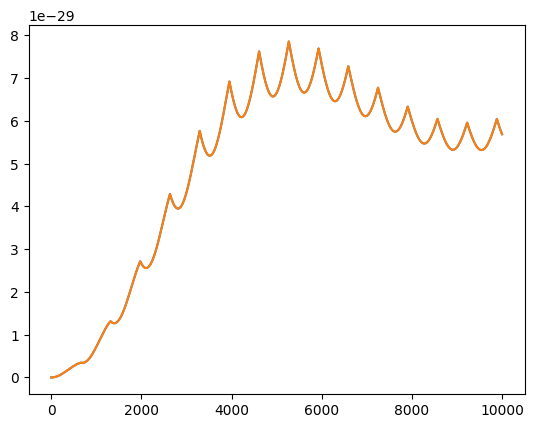

In [105]:
plt.plot(Ei)
plt.plot(Es)
#plt.plot(Ep)

In [7]:
np.sum(np.abs(Ai) ** 2)

NameError: name 'Ai' is not defined

In [ ]:
np.max(np.abs(gaussian.add_quantum_noise()))

8.733562900149742e-15

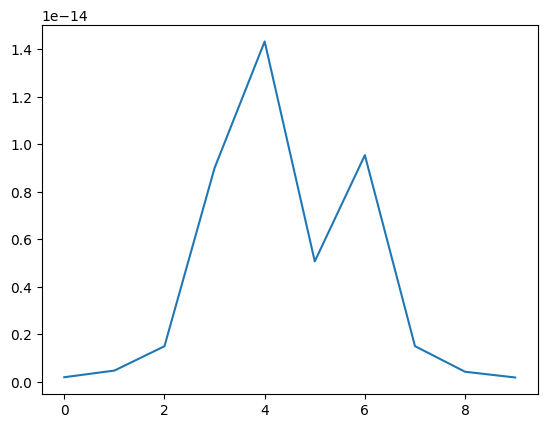

In [ ]:
# Gaussian pulse
gaussian_noise = GaussianPulse(
    wavelength_central=1550e-9,  # Central wavelength in meters
    wavelength_bandwidth=20e-9,  # Bandwidth in meters
    mean_power=1e-12,  # Mean power in Watts
    repetition_rate=61e6,  # Repetition rate in Hz
    number_of_grid_points=100, # Number of grid points
    wavelength_span=100e-9,  # Wavelength span in meters
    refractive_index_function=crystal_spdc_normal.n_p # Refractive index function
)
plt.plot(np.abs(gaussian.add_quantum_noise()))

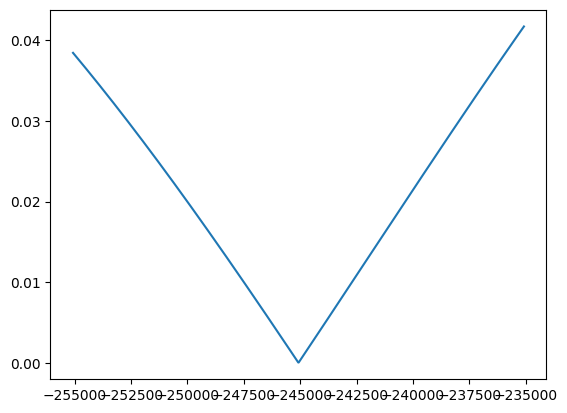

In [ ]:
wave_number_span = 20000  # Example span of wave numbers to evaluate around the central mismatch
wave_number_grid_points = 1000  # Number of points to discretize the wave number span

wave_number_array, pmf = crystal_spdc_normal.phase_matching_function(wave_number_span, wave_number_grid_points)
plt.plot(wave_number_array, np.abs(pmf))

In [ ]:
crystal_spdc_normal.wavevector_mismatch()(gaussian.frequency_central, gaussian.frequency_central)

-457192.81629371084